In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
# Create a file path
ulta_csv = Path("ulta_cleansers.csv")
sephora_csv = Path("sephora_new.csv")

ulta_csv = pd.read_csv(ulta_csv)
sephora_csv = pd.read_csv(sephora_csv)

ulta_csv.dropna()

,brand,categories,details,price,product,rating,reviews,size
0,First Aid Beauty,"Home,Skin Care,Cleansers,Face Wash",Infused with a powerful botanical antioxidant ...,$21.00,Face Cleanser,4.60 out of 5 stars,608.0,Size 5.0 oz
1,Clinique,"Home,Skin Care,Cleansers,Face Wash",Clinique's Acne Solutions Cleansing Foam goes ...,$22.50,Acne Solutions Cleansing Foam,4.50 out of 5 stars,1063.0,Size 4.2 oz
2,It Cosmetics,"Home,Skin Care,Cleansers,Face Wash",Confidence in a Cleanser Gentle Face Wash is a...,$28.00,Confidence in a Cleanser Gentle Face Wash,4.50 out of 5 stars,601.0,Size 5.0 oz
3,CeraVe,"Home,Skin Care,Cleansers,Face Wash","Developed with dermatologists, CeraVe Acne Foa...",$14.99,Acne Foaming Cream Cleanser,4.00 out of 5 stars,113.0,Size 5.0 oz
4,La Roche-Posay,"Home,Skin Care,Cleansers,Face Wash",La Roche-Posay Toleriane Purifying Foaming Fac...,$14.99,Toleriane Purifying Foaming Face Wash for Oily...,4.60 out of 5 stars,532.0,Size 13.52 oz
...,...,...,...,...,...,...,...,...
1045,CeraVe,"Home,Skin Care,Cleansers,Face Wash","Developed with dermatologists, the CeraVe Hydr...",$13.49,Hydrating Facial Cleanser,4.20 out of 5 stars,732.0,Item 2559841
1046,CeraVe,"Home,Skin Care,Cleansers,Face Wash","Developed with dermatologists, CeraVe Renewing...",$13.99,Renewing SA Cleanser,3.90 out of 5 stars,333.0,Size 8.0 oz
1047,Peter Thomas Roth,"Home,Skin Care,Cleansers,Face Wash","Oil-free, anti-wrinkle technology helps to cla...",$39.00,Anti-Aging Cleansing Gel,4.40 out of 5 stars,335.0,Size 8.5 oz
1048,CeraVe,"Home,Skin Care,Cleansers,Face Wash",CeraVe's Foaming Facial Cleanser has a unique ...,$14.99,Foaming Facial Cleanser,4.30 out of 5 stars,594.0,Item 2254420


In [3]:
sephora_csv.dropna()
sephora_csv

,Unnamed: 0,brand,name,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category_Anti-Aging,...,category_Setting_Spray_&_Powder,category_Sheet_Masks,category_Skincare,category_Tinted_Moisturizer,category_Toners,category_Tools,category_Value_&_Gift_Sets,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
0,0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69,1,0,...,0,0,0,0,0,0,0,0.74,0.42,40.24
1,1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1.00,0,0,...,0,0,0,0,0,0,0,0.80,0.83,175.00
2,2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08,0,0,...,0,0,0,0,0,0,0,1.06,0.20,36.11
3,3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.70,1,0,...,0,0,0,0,0,0,0,0.67,0.42,40.00
4,4,SK-II,Facial Treatment Essence,179.0,788,68880,4.0622,NaN,0,0,...,0,0,0,0,0,0,0,1.14,0.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,1779,Origins,Dr. Weil For Origins‚Ñ¢ Mega-Mushroom Skin Rel...,50.0,11,2261,4.0000,0.50,1,0,...,0,0,0,0,0,0,0,0.49,36.36,100.00
1685,1780,Klorane,BB Eye Cream with Soothing Cornflower,26.0,21,1625,3.2381,0.50,0,0,...,0,0,0,0,0,0,0,1.29,15.42,52.00
1686,1782,Guerlain,Abeille Royale Gold Eyetech Eye Sculpt Serum,130.0,13,2659,4.0769,0.50,0,0,...,0,0,0,0,0,0,0,0.49,31.36,260.00
1687,1783,KENZOKI,Lotus Caress to Moisturize Eyes,35.0,8,606,3.5000,0.50,0,0,...,0,0,0,0,0,0,0,1.32,43.75,70.00


In [4]:
sephora_csv.dtypes                          

Unnamed: 0                              int64
brand                                  object
name                                   object
price                                 float64
n_of_reviews                            int64
n_of_loves                              int64
review_score                          float64
size                                  float64
clean_product                           int64
category_Anti-Aging                     int64
category_BB_&_CC_Cream                  int64
category_Bath_&_Shower                  int64
category_Beauty_Supplements             int64
category_Blemish_&_Acne_Treatments      int64
category_Blotting_Papers                int64
category_Body_Lotions_&_Body_Oils       int64
category_Cellulite_&_Stretch_Marks      int64
category_Decollete_&_Neck_Creams        int64
category_Exfoliators                    int64
category_Eye_Creams_&_Treatments        int64
category_Eye_Masks                      int64
category_Face_Masks               

In [5]:
sephora_csv["brand"].count()

1689

In [6]:
sephora_brand_count = sephora_csv["brand"].count()
sephora_brand_count

1689

In [7]:
sephora_csv["brand"].unique()

array(['Drunk Elephant', 'La Mer', 'IT Cosmetics', 'Tatcha', 'SK-II',
       'The Ordinary', "Kiehl's Since 1851", 'belif', 'bareMinerals',
       'SEPHORA COLLECTION', 'Fresh', 'Farmacy', 'CLINIQUE',
       'First Aid Beauty', 'OLEHENRIKSEN', 'Supergoop!', 'Dr. Jart+',
       'SUNDAY RILEY', 'Glow Recipe', 'Caudalie', 'Erborian',
       'Youth To The People', 'Charlotte Tilbury', 'LANEIGE',
       'Bobbi Brown', 'Josie Maran', 'Origins', 'tarte', 'Biossance',
       'FARSALI', 'Peter Thomas Roth', 'GLAMGLOW', 'Herbivore',
       'Smashbox', 'Dior', 'Guerlain', 'Perricone MD', 'Algenist',
       'AMOREPACIFIC', 'KORA Organics', 'Lanc√¥me', 'Murad',
       'MILK MAKEUP', 'MAKE UP FOR EVER', 'Shiseido', 'philosophy',
       'Jack Black', 'Mario Badescu', 'Kopari', 'Briogeo',
       'Dr. Dennis Gross Skincare', 'Dermalogica', 'REN Clean Skincare',
       'Est√©e Lauder', 'KORRES', 'Dr. Brandt Skincare', 'Lancer',
       'COOLA', 'Volition Beauty', 'Kate Somerville', 'boscia',
       'Satu

In [8]:
ulta_csv['main'] = [i.split(',')[1] for i in ulta_csv['categories']]
ulta_csv = ulta_csv[ulta_csv['main'] == 'Skin Care']

In [9]:
ulta_csv['category'] = [i.split(',')[2] for i in ulta_csv['categories']]

In [10]:
ulta_csv['type'] = [i.split(',')[-1] for i in ulta_csv['categories']]


In [11]:
ulta_csv['null_type'] = ulta_csv.apply(lambda x: x.category == x.type, axis =1)

In [12]:
# ulta_csv.loc[ulta_csv.null_type == True, 'type'] = np.nan

In [13]:
ulta_csv = ulta_csv.drop(columns=['categories','null_type'])
ulta_csv

,brand,details,price,product,rating,reviews,size,main,category,type
0,First Aid Beauty,Infused with a powerful botanical antioxidant ...,$21.00,Face Cleanser,4.60 out of 5 stars,608.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash
1,Clinique,Clinique's Acne Solutions Cleansing Foam goes ...,$22.50,Acne Solutions Cleansing Foam,4.50 out of 5 stars,1063.0,Size 4.2 oz,Skin Care,Cleansers,Face Wash
2,It Cosmetics,Confidence in a Cleanser Gentle Face Wash is a...,$28.00,Confidence in a Cleanser Gentle Face Wash,4.50 out of 5 stars,601.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash
3,CeraVe,"Developed with dermatologists, CeraVe Acne Foa...",$14.99,Acne Foaming Cream Cleanser,4.00 out of 5 stars,113.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash
4,La Roche-Posay,La Roche-Posay Toleriane Purifying Foaming Fac...,$14.99,Toleriane Purifying Foaming Face Wash for Oily...,4.60 out of 5 stars,532.0,Size 13.52 oz,Skin Care,Cleansers,Face Wash
...,...,...,...,...,...,...,...,...,...,...
1045,CeraVe,"Developed with dermatologists, the CeraVe Hydr...",$13.49,Hydrating Facial Cleanser,4.20 out of 5 stars,732.0,Item 2559841,Skin Care,Cleansers,Face Wash
1046,CeraVe,"Developed with dermatologists, CeraVe Renewing...",$13.99,Renewing SA Cleanser,3.90 out of 5 stars,333.0,Size 8.0 oz,Skin Care,Cleansers,Face Wash
1047,Peter Thomas Roth,"Oil-free, anti-wrinkle technology helps to cla...",$39.00,Anti-Aging Cleansing Gel,4.40 out of 5 stars,335.0,Size 8.5 oz,Skin Care,Cleansers,Face Wash
1048,CeraVe,CeraVe's Foaming Facial Cleanser has a unique ...,$14.99,Foaming Facial Cleanser,4.30 out of 5 stars,594.0,Item 2254420,Skin Care,Cleansers,Face Wash


In [14]:
#ratings to integer 

ulta_csv['price'] = ulta_csv['price'].str.extract('(\d+\.\d+)').astype('float')
ulta_csv['rating'] = ulta_csv['rating'].str.extract('(\d+\.\d+)').astype('float')
ulta_csv['size_oz'] = ulta_csv['size'].str.extract('Size\s(\d+\.\d+)\soz').astype('float')

In [15]:

ulta_csv

,brand,details,price,product,rating,reviews,size,main,category,type,size_oz
0,First Aid Beauty,Infused with a powerful botanical antioxidant ...,21.00,Face Cleanser,4.6,608.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash,5.00
1,Clinique,Clinique's Acne Solutions Cleansing Foam goes ...,22.50,Acne Solutions Cleansing Foam,4.5,1063.0,Size 4.2 oz,Skin Care,Cleansers,Face Wash,4.20
2,It Cosmetics,Confidence in a Cleanser Gentle Face Wash is a...,28.00,Confidence in a Cleanser Gentle Face Wash,4.5,601.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash,5.00
3,CeraVe,"Developed with dermatologists, CeraVe Acne Foa...",14.99,Acne Foaming Cream Cleanser,4.0,113.0,Size 5.0 oz,Skin Care,Cleansers,Face Wash,5.00
4,La Roche-Posay,La Roche-Posay Toleriane Purifying Foaming Fac...,14.99,Toleriane Purifying Foaming Face Wash for Oily...,4.6,532.0,Size 13.52 oz,Skin Care,Cleansers,Face Wash,13.52
...,...,...,...,...,...,...,...,...,...,...,...
1045,CeraVe,"Developed with dermatologists, the CeraVe Hydr...",13.49,Hydrating Facial Cleanser,4.2,732.0,Item 2559841,Skin Care,Cleansers,Face Wash,NaN
1046,CeraVe,"Developed with dermatologists, CeraVe Renewing...",13.99,Renewing SA Cleanser,3.9,333.0,Size 8.0 oz,Skin Care,Cleansers,Face Wash,8.00
1047,Peter Thomas Roth,"Oil-free, anti-wrinkle technology helps to cla...",39.00,Anti-Aging Cleansing Gel,4.4,335.0,Size 8.5 oz,Skin Care,Cleansers,Face Wash,8.50
1048,CeraVe,CeraVe's Foaming Facial Cleanser has a unique ...,14.99,Foaming Facial Cleanser,4.3,594.0,Item 2254420,Skin Care,Cleansers,Face Wash,NaN


In [16]:
ulta_csv["category"].unique()

array(['Cleansers', 'Korean Skin Care', 'Travel Size',
       'Treatment & Serums', 'Tools', 'Gifts & Value Sets',
       'Moisturizers'], dtype=object)

In [17]:
ulta_csv.dtypes

brand        object
details      object
price       float64
product      object
rating      float64
reviews     float64
size         object
main         object
category     object
type         object
size_oz     float64
dtype: object

In [18]:
ulta_csv.isnull().sum()

brand         0
details       0
price         0
product       0
rating       40
reviews      40
size          0
main          0
category      0
type          0
size_oz     271
dtype: int64

In [19]:
ulta_csv = ulta_csv.dropna()

In [20]:
ulta_csv.isnull().sum()

brand       0
details     0
price       0
product     0
rating      0
reviews     0
size        0
main        0
category    0
type        0
size_oz     0
dtype: int64

In [21]:
new = ulta_csv["type"].unique()
new

array(['Face Wash', 'Korean Skin Care', 'Toner', 'Exfoliators & Scrubs',
       'Travel Size', 'Cleansers', 'Cleansing Oils', 'Face Masks',
       'Acne & Blemish Treatments', 'Facial Peels', 'Cleansing Brushes',
       'Cleansing Wipes', 'Lip Care'], dtype=object)

In [22]:
brand_count = ulta_csv["brand"].count()
brand_count

667

In [23]:
brand = sephora_csv["brand"].count()
brand

1689

In [24]:
#per label summary 
brand_grouped = ulta_csv.groupby(["brand"])
brand_label = ulta_csv.set_index(["brand"])["type"]
brand_label.dropna()

brand
First Aid Beauty     Face Wash
Clinique             Face Wash
It Cosmetics         Face Wash
CeraVe               Face Wash
La Roche-Posay       Face Wash
                       ...    
Tula                 Face Wash
PEACH & LILY         Face Wash
The Ordinary         Face Wash
CeraVe               Face Wash
Peter Thomas Roth    Face Wash
Name: type, Length: 667, dtype: object

In [25]:
#total brand count
per_brand_count = brand_grouped["brand"].count()
per_brand_count.dropna()

brand
ACURE                   7
ARCONA                  3
Ahava                   2
Alpha Skin Care         1
Ancient Healing Clay    1
                       ..
cocokind                4
e.l.f. Cosmetics        7
florence by mills       8
frank body              8
jane iredale            2
Name: brand, Length: 148, dtype: int64

In [26]:
#average price per brand 
brand_avg_price = brand_grouped["price"].mean()
brand_avg_price.dropna()

brand
ACURE                   11.704286
ARCONA                  43.000000
Ahava                   29.500000
Alpha Skin Care          8.990000
Ancient Healing Clay     9.990000
                          ...    
cocokind                15.990000
e.l.f. Cosmetics         7.285714
florence by mills       13.750000
frank body              24.075000
jane iredale            31.500000
Name: price, Length: 148, dtype: float64

In [27]:
#brand rating avg
brand_rating_avg = brand_grouped["rating"].mean()
brand_rating_avg.dropna()

brand
ACURE                   4.442857
ARCONA                  4.466667
Ahava                   4.250000
Alpha Skin Care         4.700000
Ancient Healing Clay    4.300000
                          ...   
cocokind                4.825000
e.l.f. Cosmetics        3.900000
florence by mills       4.412500
frank body              4.550000
jane iredale            4.500000
Name: rating, Length: 148, dtype: float64

In [44]:
# average = sephora_csv.groupby("brand")[["price","review_score"]].mean()
corr=st.pearsonr(sephora_csv["price"],sephora_csv["review_score"])
print(f"The correlation between price and rating is: {round(corr[0],2)}")

The correlation between price and rating is: 0.07


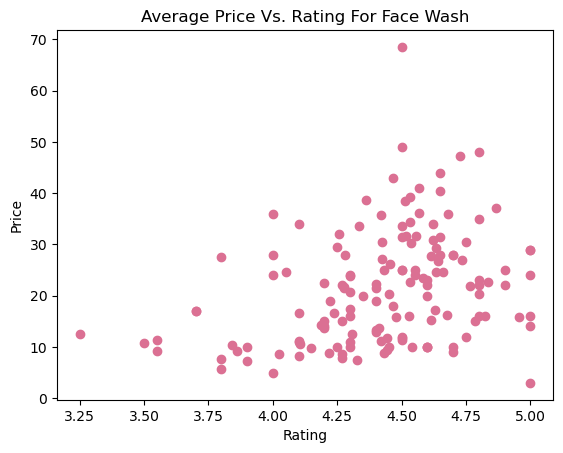

In [43]:
#scatter plot
# face_wash= ulta_csv.loc[ulta_csv["type"] == "Face Wash",:]
average = ulta_csv.groupby("brand")[["price","rating"]].mean()

plt.scatter(average["rating"],average["price"], color="palevioletred")
plt.title("Average Price Vs. Rating For Face Wash")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()

The correlation between price and rating is: 0.32


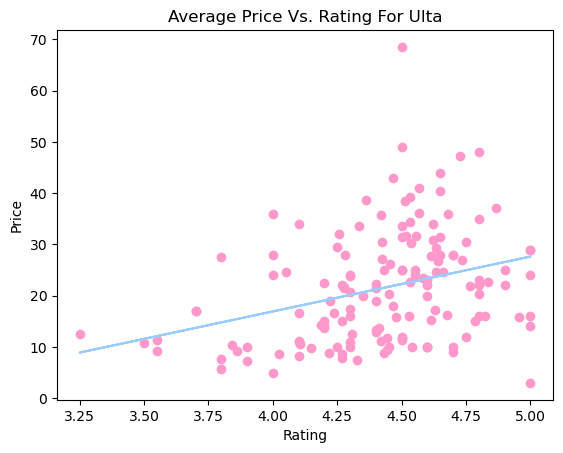

In [42]:
corr=st.pearsonr(average["price"],average["rating"])
print(f"The correlation between price and rating is: {round(corr[0],2)}")
x_values = average["rating"]
y_values = average["price"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#FF99CC")
plt.plot(x_values,regress_values, color="#99CCFF")
plt.annotate(line_eq,(5.8,0.8),fontsize=15)
plt.title("Average Price Vs. Rating For Ulta")
plt.xlabel("Rating")

plt.ylabel("Price")
plt.show()

In [30]:
ulta_csv.describe()

,price,rating,reviews,size_oz
count,667.000000,667.000000,667.000000,667.000000
mean,21.293193,4.413493,221.944528,4.869747
std,12.435378,0.431873,446.182727,2.539421
min,2.990000,2.000000,1.000000,0.270000
25%,12.000000,4.200000,16.000000,3.400000
50%,18.000000,4.500000,66.000000,4.900000
75%,28.000000,4.700000,243.000000,6.300000
max,85.000000,5.000000,4313.000000,16.900000


In [50]:
ulta_csv["price"].median()

18.0

In [32]:
sephora_csv.describe()

,Unnamed: 0,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category_Anti-Aging,category_BB_&_CC_Cream,category_Bath_&_Shower,...,category_Setting_Spray_&_Powder,category_Sheet_Masks,category_Skincare,category_Tinted_Moisturizer,category_Toners,category_Tools,category_Value_&_Gift_Sets,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
count,1689.000000,1689.000000,1689.00000,1689.000000,1689.000000,1463.000000,1689.000000,1689.000000,1689.000000,1689.000000,...,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1463.000000
mean,883.120782,63.368620,234.39550,13348.523979,4.184594,1.902269,0.190645,0.014802,0.020722,0.000592,...,0.002960,0.000592,0.000592,0.000592,0.004144,0.014210,0.006513,2.562386,31.978970,58.963602
std,518.854505,47.576774,474.69704,23352.847741,0.444514,2.081565,0.392926,0.120794,0.142495,0.024332,...,0.054344,0.024332,0.024332,0.024332,0.064263,0.118389,0.080462,8.982018,79.023947,59.382353
min,0.000000,4.000000,1.00000,104.000000,1.000000,0.080000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.060000,1.500000
25%,433.000000,36.000000,17.00000,2077.000000,3.957100,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630000,1.680000,23.530000
50%,879.000000,50.000000,70.00000,4972.000000,4.222200,1.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.130000,5.850000,42.000000
75%,1326.000000,75.000000,252.00000,13022.000000,4.457300,1.700000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.110000,24.690000,76.165000
max,1784.000000,495.000000,7000.00000,235409.000000,5.000000,32.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,279.100000,500.000000,520.000000


In [51]:
sephora_csv["price"].median()

50.0

In [34]:
line_info_ulta = ulta_csv.groupby("brand")["price"].mean().sort_values(ascending=False)
line_info_ulta

brand
Dr. Brandt          68.500000
SUNDAY RILEY        49.000000
OSEA                48.000000
Grown Alchemist     47.250000
SAND & SKY          44.000000
                      ...    
Bioré                7.418571
e.l.f. Cosmetics     7.285714
SheaMoisture         5.663333
ChapStick            4.990000
Miss Spa             2.990000
Name: price, Length: 148, dtype: float64

In [35]:
list_of_items = ['Drunk Elephant', 'La Mer', 'IT Cosmetics', 'Tatcha', 'SK-II',
       'The Ordinary', "Kiehl's Since 1851", 'belif', 'bareMinerals',
       'SEPHORA COLLECTION', 'Fresh', 'Farmacy', 'CLINIQUE',
       'First Aid Beauty', 'OLEHENRIKSEN', 'Supergoop!', 'Dr. Jart+',
       'SUNDAY RILEY', 'Glow Recipe', 'Caudalie', 'Erborian',
       'Youth To The People', 'Charlotte Tilbury', 'LANEIGE',
       'Bobbi Brown', 'Josie Maran', 'Origins', 'tarte', 'Biossance',
       'FARSALI', 'Peter Thomas Roth', 'GLAMGLOW', 'Herbivore',
       'Smashbox', 'Dior', 'Guerlain', 'Perricone MD', 'Algenist',
       'AMOREPACIFIC', 'KORA Organics', 'Lanc√¥me', 'Murad',
       'MILK MAKEUP', 'MAKE UP FOR EVER', 'Shiseido', 'philosophy',
       'Jack Black', 'Mario Badescu', 'Kopari', 'Briogeo',
       'Dr. Dennis Gross Skincare', 'Dermalogica', 'REN Clean Skincare',
       'Est√©e Lauder', 'KORRES', 'Dr. Brandt Skincare', 'Lancer',
       'COOLA', 'Volition Beauty', 'Kate Somerville', 'boscia',
       'Saturday Skin', 'FARS√ÅLI', 'Skinfix', 'Clarins', 'Kat Von D',
       'Obagi Clinical', 'Tata Harper', 'Omorovicza', 'Go-To ',
       'Naturally Serious', 'J.One', "L'Occitane", 'Laura Mercier',
       "Dr Roebuck's", 'Too Cool For School', 'Indie Lee', 'rms beauty',
       'High Beauty', 'lilah b.', 'Blithe', 'Evian', 'Moroccanoil',
       'Erno Laszlo', 'Eve Lom', 'DERMAdoctor', 'BeautyBio', 'Moon Juice',
       'RODIN olio lusso ', 'Son & Park', 'Marc Jacobs Beauty',
       'Edible Beauty', 'Proactiv', 'Koh Gen Do', 'Wander Beauty',
       'Anthony', 'Skin Laundry', 'Urban Decay', 'LXMI', 'Vitruvi',
       'BIOEFFECT', 'Pretty Vulgar', 'KENZOKI', 'Isle of Paradise',
       'Primary Raw', 'Ciat√© London', 'Skin Inc Supplement Bar',
       'Acqua Di Parma', 'Nurse Jamie', 'NARS',
       'St. Tropez Tanning Essentials', 'Peace Out', 'BECCA',
       'HUM Nutrition', 'Flora + Bast', 'COVER FX', 'Neogen Dermalogy',
       'LightStim ', 'NuFACE', 'Alpha-H', 'Private Doctor',
       'StackedSkincare', 'Foreo', 'Dermarche Labs', 'Natasha Denona',
       'Slip', 'Vital Proteins', 'Mount Lai', 'The Beauty Chef',
       'Sephora Favorites', 'Cocofloss', 'WelleCo', 'Crushed Tonic',
       '8Greens', 'Golde', 'Ouai', 'Four Sigmatic', 'bkr', 'Clarisonic',
       'Klorane', 'Yves Saint Laurent']

# getting the length of the list by using the len method
length_of_list = len(list_of_items)

# printing the length of the list
print('The length of our list is: ', length_of_list)

The length of our list is:  141


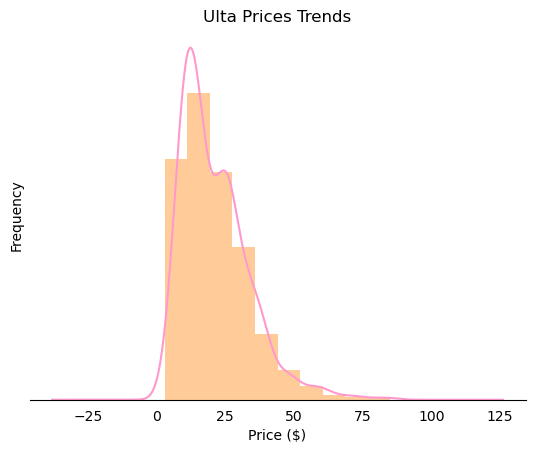

In [36]:
#ulta pricing model
# ulta_csv["price"].plot(kind="hist", bins = 20, color ="#FFCC99")

fig, ax = plt.subplots()

#sephora pricing model
ulta_csv["price"].plot(kind="hist", density = True, bins = 10, color ="#FFCC99")
ulta_csv["price"].plot(kind = "kde",color = "#FF99CC")
ax.set_xlabel("Price ($)")
ax.set_yticks([])
ax.set_ylabel("Frequency")
ax.set_title("Ulta Prices Trends")
ax.tick_params(left = False, bottom = False)

#getting rid of border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
plt.show()

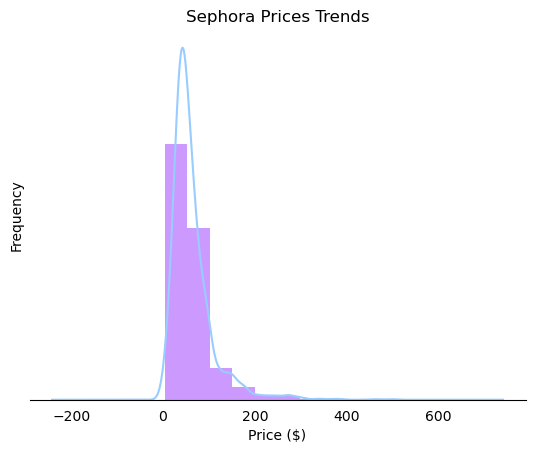

In [37]:
fig, ax = plt.subplots()

#sephora pricing model
sephora_csv["price"].plot(kind="hist", density = True, bins = 10, color ="#CC99FF")
sephora_csv["price"].plot(kind = "kde",color = "#99CCFF")
ax.set_xlabel("Price ($)")
ax.set_yticks([])
ax.set_ylabel("Frequency")
ax.set_title("Sephora Prices Trends")
ax.tick_params(left = False, bottom = False)

#getting rid of border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)   
    
plt.show()

In [38]:
combined pricing model
ulta_price = ulta_csv["price"]
sephora_price = sephora_csv["price"]

plt.hist(ulta_price,label ="Ulta", alpha=.7, bins = 15)
plt.hist(sephora_price,label ="Sephora",alpha=.5, bins = 15)
# sephora_csv["price"].plot(kind="hist", bins = 15)
# ulta_csv["price"].plot(kind="hist", bins = 15, color ="#FFCC99")
plt.legend()
plt.legend()

SyntaxError: invalid syntax (832378044.py, line 1)

In [ ]:
sns.distplot(sephora_csv["price"],bins=5)